In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from scipy.signal import savgol_filter
plt.style.use('seaborn')

# White Test blank/calibration from 3/30/21

Plotting these out to see what the earliest spectra white test blank spectra from the Green configuration spectrometers looked like.

In [2]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210330_spectrometer_tests/spect_test5.h5'
file = path_name + test_file_name

with h5py.File(file, 'r') as h5_file:
    vis_cal = h5_file['session001/cal001'].attrs['white_spectrum'][:]
    ftir_cal = h5_file['session001/cal001'].attrs['white_spectrum2'][:]
    vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

with h5py.File(file, 'r') as h5_file:
    vis_abs_ins001 = h5_file['session001/cal001/ins001/spectrometer1/derived/absorbances'][:]
    vis_ins001 = h5_file['session001/cal001/ins001/spectrometer1/spectra'][:]
    ftir_abs_ins001 = h5_file['session001/cal001/ins001/spectrometer2/derived/absorbances'][:]
    ftir_ins001 = h5_file['session001/cal001/ins001/spectrometer2/spectra'][:]

### Plot of visible light spectrometer raw spectra 3/30/21

Recorded calibration temperature:  22.1 C, ins001 temp: 22.3 C.

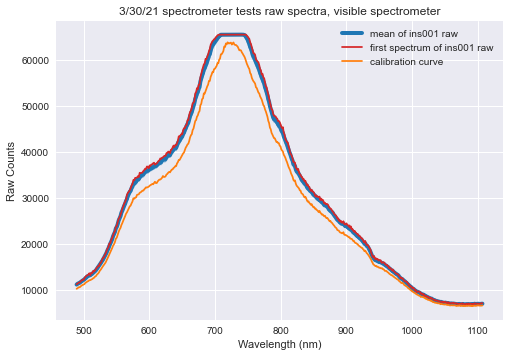

In [3]:
fig, ax = plt.subplots()
ax.set_title("3/30/21 spectrometer tests raw spectra, visible spectrometer")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
ax.plot(vis_waves, vis_ins001.mean(axis=0), "tab:blue", lw=4, label="mean of ins001 raw")
ax.plot(vis_waves, vis_ins001.mean(axis=0) - vis_ins001.std(axis=0), "tab:blue", alpha=0.5)
ax.plot(vis_waves, vis_ins001.mean(axis=0) + vis_ins001.std(axis=0), "tab:blue", alpha=0.5)
ax.plot(vis_waves, vis_ins001[0, :], "tab:red", label="first spectrum of ins001 raw" )
ax.plot(vis_waves, vis_cal, "tab:orange", label="calibration curve")
ax.legend()
plt.show()
plt.close()

In [4]:
with h5py.File(file, 'r') as h5_file:
    cal1_temp = h5_file['session001/cal001'].attrs['ftir_temperature']
    ins001_temp = h5_file['session001/cal001/ins001'].attrs['ftir_temp']
print(cal1_temp, ins001_temp)
    


22.091682904722404 22.3192455782077


### Plot of FTIR Engine raw spectra 3/30/21

Looks like the test blank was not well placed for the stationary insertion ins001.

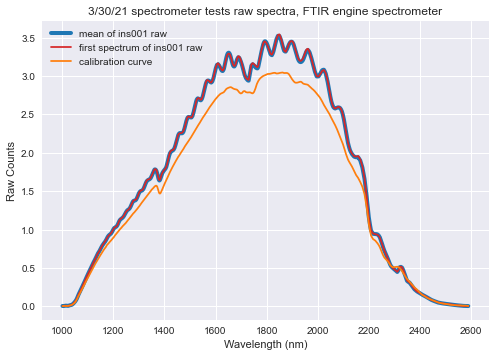

In [5]:
fig, ax = plt.subplots()
ax.set_title("3/30/21 spectrometer tests raw spectra, FTIR engine spectrometer")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
ax.plot(ftir_waves, ftir_ins001.mean(axis=0), "tab:blue", lw=4, label="mean of ins001 raw")
ax.plot(ftir_waves, ftir_ins001[0, :], "tab:red", label="first spectrum of ins001 raw" )
ax.plot(ftir_waves, ftir_cal, "tab:orange", label="calibration curve")
ax.legend()
plt.show()
plt.close()

# Raw spectra from 4/19/21 morning

This section is just a first look at the data from this date, as I try to figure out the cause of the odd spectra shapes.

Data collected in this section are from the white test blank.

I discovered that the temperatures recorded were not updated with each new calibration/insertion.  Calibration temperatures were updated at the start of each session; insertion temperatures were updated at each calibration.  This has since been fixed in the software.

In [6]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210419_green_tests/green_testing_210419.h5'
file = path_name + test_file_name

with h5py.File(file, 'r') as h5_file:
    vis_cal2 = h5_file['session001/cal002'].attrs['white_spectrum'][:]
    ftir_cal2 = h5_file['session001/cal002'].attrs['white_spectrum2'][:]
    vis_waves = h5_file['session001/cal002'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal002'].attrs['spec2_wavelengths_vector'][:]
    vis_cal3 = h5_file['session001/cal003'].attrs['white_spectrum'][:]
    ftir_cal3 = h5_file['session001/cal003'].attrs['white_spectrum2'][:]

### Plot of visible spectrometer calibration curves 4/19/21 morning

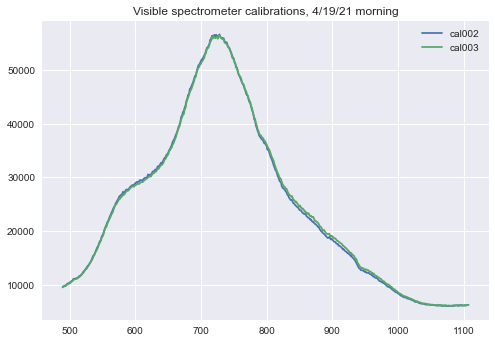

In [7]:
fig, ax = plt.subplots()
ax.set_title("Visible spectrometer calibrations, 4/19/21 morning")
ax.plot(vis_waves, vis_cal2, label="cal002")
ax.plot(vis_waves, vis_cal3, label="cal003")
ax.legend()
plt.show()
plt.close()

### Plot of FTIR engine calibration curves 4/19/21 morning

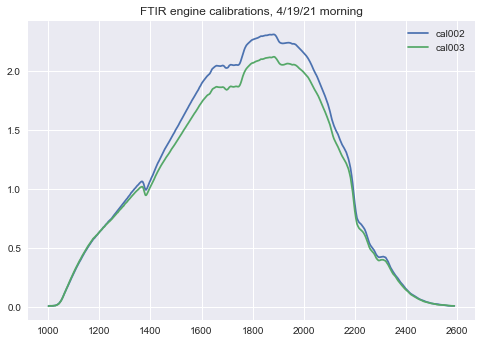

In [8]:
fig, ax = plt.subplots()
ax.set_title("FTIR engine calibrations, 4/19/21 morning")
ax.plot(ftir_waves, ftir_cal2, label="cal002")
ax.plot(ftir_waves, ftir_cal3, label="cal003")
ax.legend()
plt.show()
plt.close()

### Plot of stationary spectra of test blank, 4/19/21 morning

Each curve represents the mean of 60 spectra acquired in a group, with some time passing between each group.

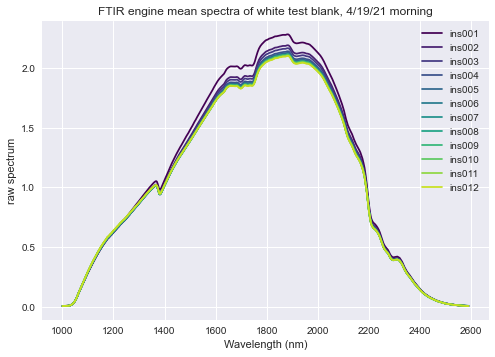

In [9]:
ins_cal2 = ['ins001', 'ins002', 'ins003', 'ins004', 'ins005', 'ins006', 'ins007', 'ins008']
ins_cal3 = ['ins009', 'ins010', 'ins011', 'ins012']

fig, ax = plt.subplots()
ax.set_title("FTIR engine mean spectra of white test blank, 4/19/21 morning")
ax.set_ylabel("raw spectrum")
ax.set_xlabel("Wavelength (nm)")
count = len(ins_cal2) + len(ins_cal3)
with h5py.File(file, 'r') as h5_file:
    for insertion in ins_cal2:
        index=ins_cal2.index(insertion)
        color = plt.cm.viridis(index/count)
        ftir_raw = h5_file[f'session001/cal002/{insertion}/spectrometer2/spectra'][:]
        ax.plot(ftir_waves, ftir_raw.mean(axis=0), label=insertion, color=color) 
    
with h5py.File(file, 'r') as h5_file:
    for insertion in ins_cal3:
        index = ins_cal3.index(insertion)
        color = plt.cm.viridis((index + len(ins_cal2))/count)
        ftir_raw = h5_file[f'session001/cal003/{insertion}/spectrometer2/spectra'][:]
        ax.plot(ftir_waves, ftir_raw.mean(axis=0), label=insertion, color=color)
ax.legend()        
plt.show()        
plt.close()

### Temperatures from 4/19/21 morning

These are the temperatures recorded for the calibrations and the measured spectra.  It is clear that the software was not recording updated temperatures for each calibration and each insertion.  What is recorded suggests that the temperature was trending gradually higher over time.

In [10]:
with h5py.File(file, 'r') as h5_file:
    cal2_temp = h5_file['session001/cal002'].attrs['ftir_temperature']
    cal3_temp = h5_file['session001/cal003'].attrs['ftir_temperature']

cal2_temps = []
with h5py.File(file, 'r') as h5_file:
    for insertion in ins_cal2:
        cal2_temps.append(h5_file[f'session001/cal002/{insertion}'].attrs['ftir_temp'])

cal3_temps = []
with h5py.File(file, 'r') as h5_file:
    for insertion in ins_cal3:
        cal3_temps.append(h5_file[f'session001/cal003/{insertion}'].attrs['ftir_temp'])
print("Cal2 calibration temp: ", cal2_temp, " Cal2 insertion temps: ", cal2_temps)
print()
print("Cal3 calibration temp: ", cal3_temp, " Cal3 insertion temps: ", cal3_temps)

Cal2 calibration temp:  17.101213138770106  Cal2 insertion temps:  [17.287485317909102, 17.287485317909102, 17.287485317909102, 17.287485317909102, 17.287485317909102, 17.287485317909102, 17.287485317909102, 17.287485317909102]

Cal3 calibration temp:  17.101213138770106  Cal3 insertion temps:  [18.693804304886726, 18.693804304886726, 18.693804304886726, 18.693804304886726]


# Spectra from 4/19/21 afternoon

This section is just a first look at the data from this date, as I try to figure out the cause of the odd spectra shapes.

Data collected in this section include spectra from the yard and from the soil canisters.

In [11]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210419_green_tests/green_testing_210419c.h5'
file = path_name + test_file_name
with h5py.File(file, 'r') as h5_file:
    vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]
    
    cals = list(h5_file['session001'].keys())
    
print(cals)

['cal001', 'cal002', 'cal003', 'cal004', 'cal005', 'cal006']


### Plot of visible spectrometer calibration curves, 4/19/21 afternoon

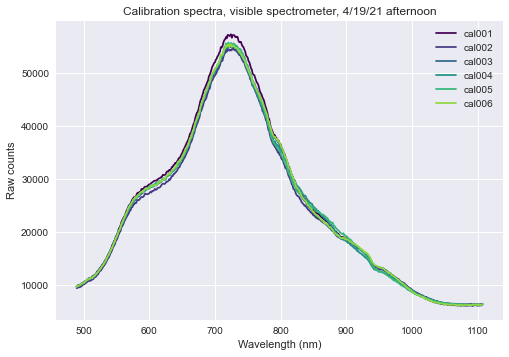

In [12]:
fig, ax = plt.subplots()
ax.set_title("Calibration spectra, visible spectrometer, 4/19/21 afternoon")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")

with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        vis_cal = h5_file[f'session001/{cal}'].attrs['white_spectrum'][:]
        index = cals.index(cal)
        color = plt.cm.viridis(index/len(cals))
        ax.plot(vis_waves, vis_cal, color=color, label=cal)
ax.legend()
plt.show()
plt.close()
        

### Plot of FTIR engine calibration curves, 4/19/21 afternoon

Cal003 - cal006 were done outside and in sunshine, and one right after the other.  Unfortunately, temps were not being updated for each calibration and insertion recorded, so I don't know what the actual temps were for each of the spectra.  But the spectra are very different one from another.  Judging by the temperatures from the insertions after cal006, by then the temperature was at least 28.5, after rising from around 25.5.

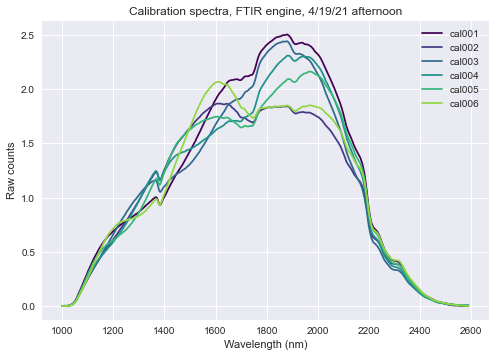

In [13]:
fig, ax = plt.subplots()
ax.set_title("Calibration spectra, FTIR engine, 4/19/21 afternoon")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")

with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        ftir_cal = h5_file[f'session001/{cal}'].attrs['white_spectrum2'][:]
        index = cals.index(cal)
        color = plt.cm.viridis(index/len(cals))
        ax.plot(ftir_waves, ftir_cal, color=color, label=cal)
ax.legend()
plt.show()
plt.close()

### Temperatures recorded for the calibrations and insertions of 4/19/21 afternoon

In [14]:
cal_temps = []
with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        cal_temps.append(h5_file[f'session001/{cal}'].attrs['ftir_temperature'])
print(cal_temps)

insertions = ['session001/cal001/ins001', 'session001/cal001/ins002', 'session001/cal001/ins003', 'session001/cal001/ins005',
             'session001/cal002/ins006', 'session001/cal002/ins007', 'session001/cal002/ins008', 'session001/cal002/ins009',
             'session001/cal006/ins010', 'session001/cal006/ins011', 'session001/cal006/ins012', 'session001/cal006/ins013']

insertion_temps = []
with h5py.File(file, 'r') as h5_file:
    
    for insertion in insertions:
        insertion_temps.append(h5_file[f'{insertion}'].attrs['ftir_temp'])
print(insertion_temps)

[25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182]
[25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.457273258346277, 25.457273258346277, 25.457273258346277, 25.457273258346277, 28.478563653676304, 28.478563653676304, 28.478563653676304, 28.478563653676304]


# Spectra from 4/20/21 morning

### Temperatures from calibrations and insertions of 4/20/21 morning

The calibration and insertion temperatures are still not being updated properly.
The insertion temperatures were updated with the previous calibration.  Thus, the final calibration probably had a temperature of 18.45, after earlier calibrations of around 20 to 21 C.  The spectra taken after cal001, cal002, and cal004 were done in the garage.  The spectra taken after cal003 were outside in the front yard (stepped insertions).

Note that cal004, taken after the temperature drop due to being outside, is quite different from the other three.

In [15]:
cals = ['cal001', 'cal002', 'cal003', 'cal004']

path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210420_green_tests/green_testing_210420.h5'
file = path_name + test_file_name

# create list of calibration temperatures
cal_temps = []
with h5py.File(file, 'r') as h5_file:
    vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]
    
    for cal in cals:
        cal_temps.append(h5_file[f'session001/{cal}'].attrs['ftir_temperature'])

print("Calibration temps:  ", cal_temps)

# create list of insertions
insertions = []
with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        cal_ins = list(h5_file[f'session001/{cal}'].keys())
        for ins in cal_ins:
            insertions.append(f'session001/{cal}/{ins}')

# create list of insertion temperatures
ins_temps = []
with h5py.File(file, 'r') as h5_file:    
    for insertion in insertions:
        ins_temps.append(h5_file[insertion].attrs['ftir_temp'])
print("Insertion temperatures: ", ins_temps)

Calibration temps:   [20.005789715422964, 20.005789715422964, 20.005789715422964, 20.005789715422964]
Insertion temperatures:  [20.21176335497819, 20.21176335497819, 20.21176335497819, 20.21176335497819, 20.99961456099294, 20.99961456099294, 20.99961456099294, 20.99961456099294, 20.99961456099294, 21.404156600133376, 21.404156600133376, 21.404156600133376, 21.404156600133376, 18.45188954353108]


### Plot calibration spectra from visible spectrometer, 4/20/21 morning.

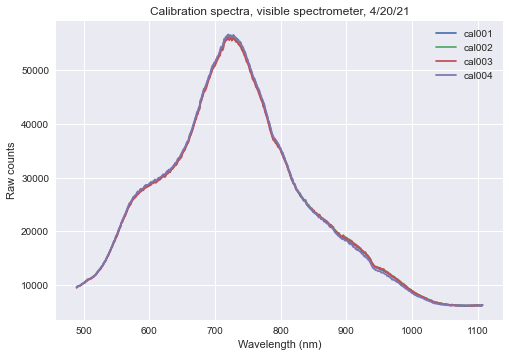

In [16]:
fig, ax = plt.subplots()
ax.set_title("Calibration spectra, visible spectrometer, 4/20/21")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")
with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        spectrum = h5_file[f'session001/{cal}'].attrs['white_spectrum'][:]
        ax.plot(vis_waves, spectrum, label=cal)
ax.legend()
plt.show()
plt.close()

### Plot calibration spectra from FTIR engine, 4/20/21 morning

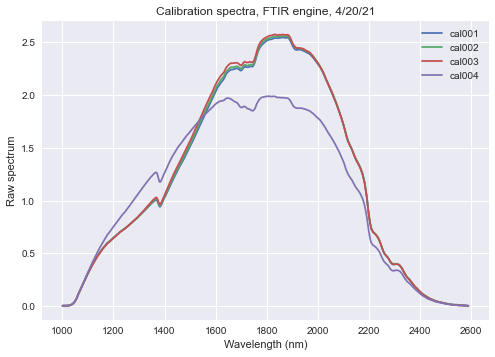

In [17]:
fig, ax = plt.subplots()
ax.set_title("Calibration spectra, FTIR engine, 4/20/21")
ax.set_ylabel("Raw spectrum")
ax.set_xlabel("Wavelength (nm)")
with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        spectrum = h5_file[f'session001/{cal}'].attrs['white_spectrum2'][:]
        ax.plot(ftir_waves, spectrum, label=cal)
ax.legend()
plt.show()
plt.close()

### Visible spectrometer mean raw spectra from insertions, 4/20/21 morning

Each curve represents the mean of 60 spectra taken in a group (for the white test blank).  For the soil insertions, the number of insertions varied.

The spectra with much lower raw counts were taken of soil; the others were of the white test blank.

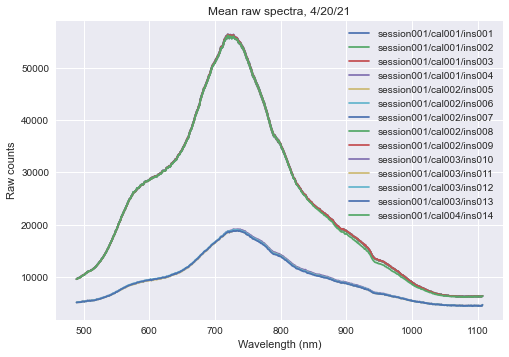

In [18]:
fig, ax = plt.subplots()
ax.set_title("Mean raw spectra, 4/20/21")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")
with h5py.File(file, 'r') as h5_file:
    for insertion in insertions:
        spectra = h5_file[f'{insertion}/spectrometer1/spectra'][:]
        ax.plot(vis_waves, spectra.mean(axis=0), label=insertion)
ax.legend()
plt.show()
plt.close()

### FTIR engine mean raw spectra from insertions, 4/20/21 morning

The spectra with much lower raw counts were taken of soil; the others were of the white test blank (mean of 60 spectra per 'insertion').

The low white test blank spectrum was taken after the final calibration, when the temperature of the spectrometer had dropped markedly.

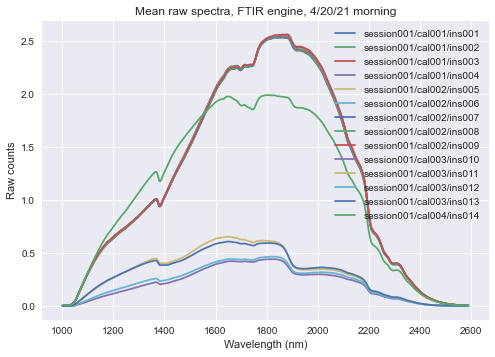

In [19]:
fig, ax = plt.subplots()
ax.set_title("Mean raw spectra, FTIR engine, 4/20/21 morning")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")
with h5py.File(file, 'r') as h5_file:
    for insertion in insertions:
        spectra = h5_file[f'{insertion}/spectrometer2/spectra'][:]
        ax.plot(ftir_waves, spectra.mean(axis=0), label=insertion)
ax.legend()
plt.show()
plt.close()

### Absorbance spectra of soil insertions, FTIR engine, 4/20/21 morning

These were taken in the front yard.  Insertions ins010 and ins012 were automatic insertions; insertions ins011 and ins013 were stepped insertions.

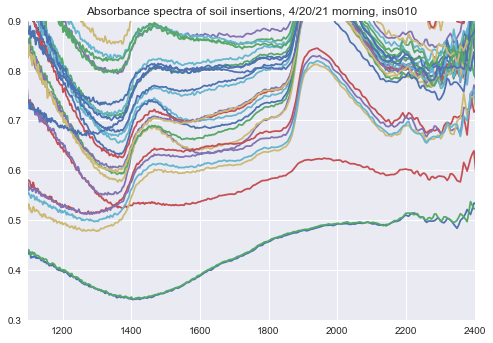

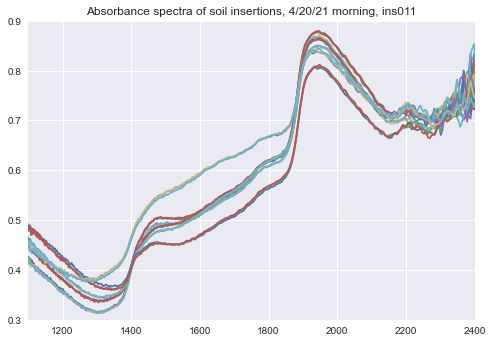

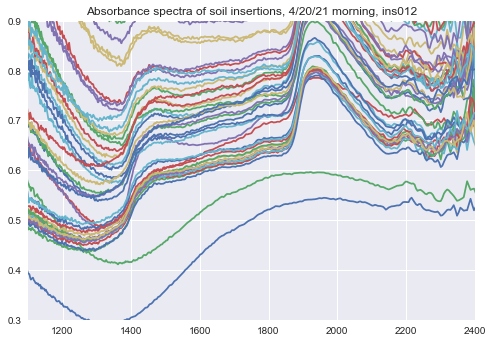

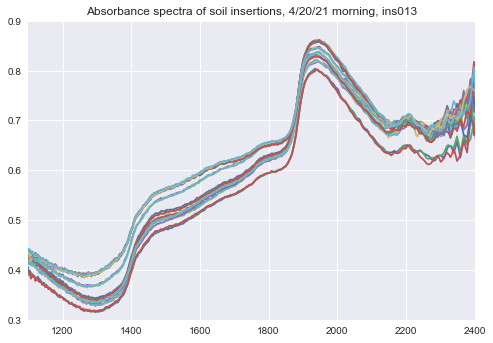

In [20]:
soil_insertions = ['ins010', 'ins011', 'ins012', 'ins013']
with h5py.File(file, 'r') as h5_file:
    for insertion in soil_insertions:
        fig, ax = plt.subplots()
        ax.set_title(f'Absorbance spectra of soil insertions, 4/20/21 morning, {insertion}')
        ax.set_ylim(0.3, 0.9)
        ax.set_xlim(1100, 2400)
        ins_abs = h5_file[f'session001/cal003/{insertion}/spectrometer2/derived/absorbances'][:]
        for i in range(ins_abs.shape[0]):
            ax.plot(ftir_waves, ins_abs[i, :])
plt.show()
plt.close()

# Comparisons of spectra acquired in stepped insertions of location "front2" in the front yard

The stepped insertions are likely the best spectra acquired of these same locations.  The spectra should be similar on repeat of the same location.

The insertions were acquired 4/19/21 morning, 4/19/21 afternoon, and 4/20/21 morning.

In [21]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210419_green_tests/green_testing_210419b.h5'
yester_morning = path_name + test_file_name

path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210419_green_tests/green_testing_210419c.h5'
yester_afternoon = path_name + test_file_name

path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210420_green_tests/green_testing_210420.h5'
this_morning = path_name + test_file_name

with h5py.File(yester_morning, 'r') as h5_file:
    front2_1 = h5_file['session002/cal001/ins002/derived/absorbance_depth'][:]
    
with h5py.File(yester_afternoon, 'r') as h5_file:
    front2_2 = h5_file['session001/cal001/ins005/derived/absorbance_depth'][:]
    
with h5py.File(this_morning, 'r') as h5_file:
    front2_3 = h5_file['session001/cal003/ins013/derived/absorbance_depth'][:]
    
# Here I make just the FTIR engine spectra into separate dataframes for each of the insertions.
front2_1_df = pd.DataFrame(front2_1[:, 512:-2])
front2_2_df = pd.DataFrame(front2_2[:, 512:-2])
front2_3_df = pd.DataFrame(front2_3[:, 512:-2])

# This adds the depth column to the dataframes.
front2_1_df['depth'] = front2_1[:, -1]
front2_2_df['depth'] = front2_2[:, -1]
front2_3_df['depth'] = front2_3[:, -1]

In [22]:
def select_by_depth_range(df, range_start, range_end):
    df_out = df.loc[(df['depth'] > range_start) & (df['depth'] < range_end)]
    return df_out

### Plots of scans of location front2 on different dates from selected depths

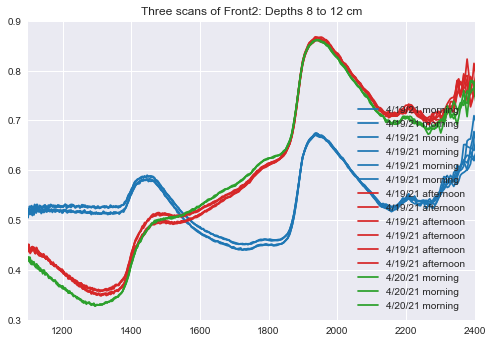

In [23]:
dfs = [front2_1_df, front2_2_df, front2_3_df]
colors = ['tab:blue', 'tab:red', 'tab:green']
labels = ['4/19/21 morning', '4/19/21 afternoon', '4/20/21 morning']
fig, ax = plt.subplots()
depth_min = 8
depth_max = 12
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
ax.set_title(f'Three scans of Front2: Depths {depth_min} to {depth_max} cm')
for df, color, label in zip(dfs, colors, labels):
    range_df = select_by_depth_range(df, depth_min, depth_max)
    
    for i in range(range_df.shape[0]):
        ax.plot(ftir_waves, range_df.iloc[i, :-1], color=color, label=label)
ax.legend()
plt.show()
plt.close()


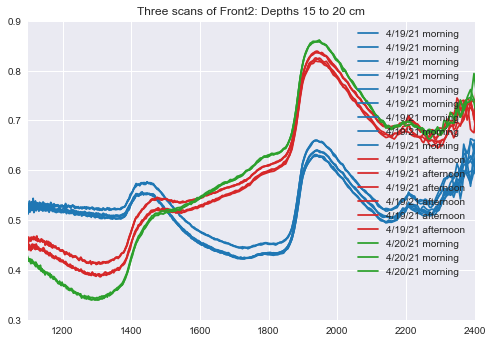

In [24]:
dfs = [front2_1_df, front2_2_df, front2_3_df]
colors = ['tab:blue', 'tab:red', 'tab:green']
labels = ['4/19/21 morning', '4/19/21 afternoon', '4/20/21 morning']
fig, ax = plt.subplots()
depth_min = 15
depth_max = 20
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
ax.set_title(f'Three scans of Front2: Depths {depth_min} to {depth_max} cm')
for df, color, label in zip(dfs, colors, labels):
    range_df = select_by_depth_range(df, depth_min, depth_max)
    
    for i in range(range_df.shape[0]):
        ax.plot(ftir_waves, range_df.iloc[i, :-1], color=color, label=label)
ax.legend(loc='upper right')
plt.show()
plt.close()

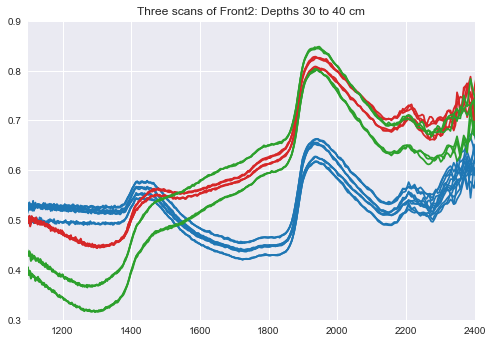

In [25]:
dfs = [front2_1_df, front2_2_df, front2_3_df]
colors = ['tab:blue', 'tab:red', 'tab:green']
fig, ax = plt.subplots()
depth_min = 30
depth_max = 40
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
ax.set_title(f'Three scans of Front2: Depths {depth_min} to {depth_max} cm')
for df, color in zip(dfs, colors):
    range_df = select_by_depth_range(df, depth_min, depth_max)
    
    for i in range(range_df.shape[0]):
        ax.plot(ftir_waves, range_df.iloc[i, :-1], color=color)
plt.show()
plt.close()

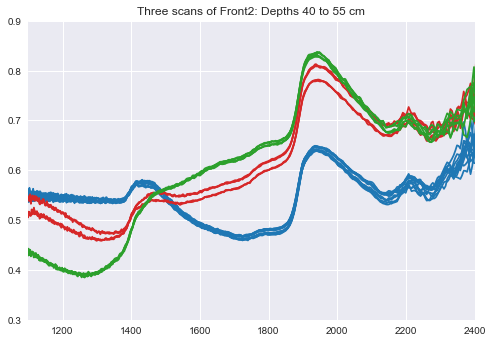

In [26]:
dfs = [front2_1_df, front2_2_df, front2_3_df]
colors = ['tab:blue', 'tab:red', 'tab:green']
fig, ax = plt.subplots()
depth_min = 40
depth_max = 55
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
ax.set_title(f'Three scans of Front2: Depths {depth_min} to {depth_max} cm')
for df, color in zip(dfs, colors):
    range_df = select_by_depth_range(df, depth_min, depth_max)
    
    for i in range(range_df.shape[0]):
        ax.plot(ftir_waves, range_df.iloc[i, :-1], color=color)
plt.show()
plt.close()

# Comparing calibration spectra over time

In [27]:
with h5py.File(this_morning, 'r') as h5_file:
    cal_attrs = list(h5_file['session001/cal003'].attrs.keys())

with h5py.File(this_morning, 'r') as h5_file:
    ins_attrs = list(h5_file['session001/cal003/ins010'].attrs.keys())

vis_file_names = ['210401_tests/vis_ftir_test1.h5',
                  '210402_SOC_canister/tests_210402.h5',
                  '210407_test_in_yard_and_canisters/soc_210407.h5',
                  '210409_stationary_moving/blank_210409.h5',
                  '210413_BNP_transect/BNP_data_collection_210413.h5',
                  '210414_BNP_transect2/BNP_data_collection_210414.h5',
                  '210415_visible_spec_tests/visspec_testing_210415.h5',
                  '210416_green_tests/green_testing_210416.h5',
                  '210419_green_tests/green_testing_210419.h5',
                  '210419_green_tests/green_testing_210419b.h5',
                  '210419_green_tests/green_testing_210419c.h5',
                  '210420_green_tests/green_testing_210420.h5',
                  '210420_green_tests/more/green_testing_210420b.h5',
                  '210420_green_tests/more/green_testing_210420c.h5',
                  '210421_green_tests/green_testing_210421.h5']
vis_file_dates =['04/01/2021', '04/02/2021', '04/07/2021',
                '04/09/2021', '04/13/2021', '04/14/2021',
                '04/15/2021', '04/16/2021', '04/19/2021',
                '04/19/2021', '04/19/2021', '04/20/2021',
                 '04/20/2021', '04/20/2021', '04/21/2021']

In [28]:
def create_list_of_items_in_node(item_type, h5_file, node):
    keys = []
    if item_type == "group":
        my_type = h5py._hl.group.Group
    if item_type == "dataset":
        my_type = h5py._hl.dataset.Dataset
    h5_file[node].visit(lambda key: keys.append(key) if type(h5_file[node][key]) is my_type else None)
    return keys

def create_list_of_calibrations_in_node(h5_file, node):
    calibrations = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'cal':
            calibrations.append(group)
    return calibrations

def create_session_calibration_dict(h5_file):
    keys = list(h5_file.keys())
    key_dict = {}
    for key in keys:
        key_dict[key] = create_list_of_calibrations_in_node(h5_file, key)
    print(key_dict)
    return key_dict

In [29]:
# This creates a list of all the calibrations in the files specified above
vis_cals = []
for file_name in vis_file_names:
    entire_path = f'{path_name}{file_name}'
    
    with h5py.File(entire_path, 'r') as h5_file:
        calibrations = create_list_of_calibrations_in_node(h5_file, "/")
        for calibration in calibrations:
            vis_cals.append((file_name, calibration))

### A plot of all the FTIR engine white calibration spectra

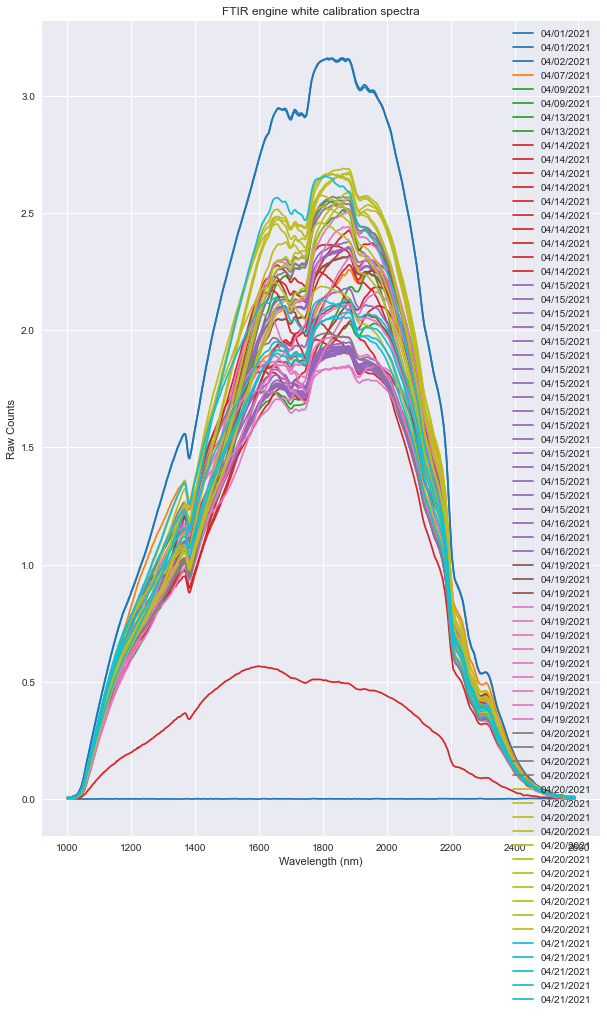

In [30]:
fig, ax = plt.subplots(figsize=(10, 15))
ax.set_title("FTIR engine white calibration spectra")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
# ax.set_ylim(10000, 30000)
for cal in vis_cals:
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.tab10(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
plt.legend(loc="upper right")
plt.show()
plt.close()

### A plot of all the white calibration spectra, offset to see the shape better

Some days they stay quite constant in shape; other days they change markedly from one spectrum to another.

Days when the device has been outside (field work) have more variation than others.


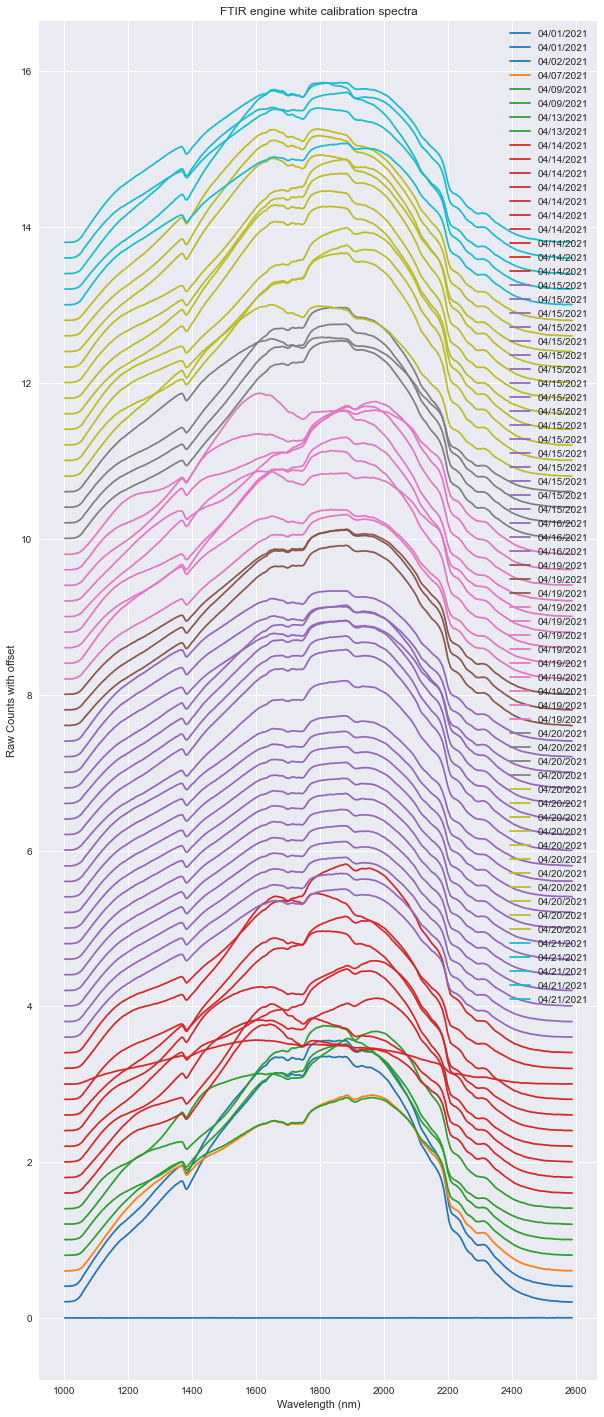

In [31]:
fig, ax = plt.subplots(figsize=(10, 25))
ax.set_title("FTIR engine white calibration spectra")
ax.set_ylabel("Raw Counts with offset")
ax.set_xlabel("Wavelength (nm)")
# ax.set_ylim(10000, 30000)
for cal in vis_cals:
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.tab10(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:] + offset
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
plt.legend(loc="upper right")
plt.show()
plt.close()

# All calibration spectra expressed as a ratio with the first calibration spectrum

### Finding the calibration temperatures for each of these calibrations

In [32]:
cal_temps = []
for cal in vis_cals:   
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        cal_temps.append(h5_file[cal[1]].attrs['ftir_temperature'])
print(cal_temps)
        

[2.6923738872865783, 2.6923738872865783, 4.752088330126355, 29.6824810831759, 27.89792262442006, 27.89792262442006, 27.526653111467795, 31.26040053289762, 25.484470789953036, 25.484470789953036, 25.484470789953036, 25.484470789953036, 25.511659256254234, 25.511659256254234, 25.511659256254234, 25.511659256254234, 25.511659256254234, 25.511659256254234, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 22.14864751125117, 22.14864751125117, 22.14864751125117, 14.514367584970273, 14.71094037304033, 14.71094037304033, 14.71094037304033, 17.688762708218064, 17.688762708218064, 17.688762708218064, 17.101213138770106, 17.101213138770106, 17.101213138770106, 20.299817058869564, 23.66879534195624, 24.526988406745375, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 20.005789715422964, 20

### Plotting the ratio spectra for each calibration

A straight line with constant ratio value for each wavelength would be a spectrum that has the same shape as the comparison spectrum.

The recorded temperature for each calibration is included in the subplot title.  Note that that this is not up-to-date; all calibrations in a given session will show the same temperature.

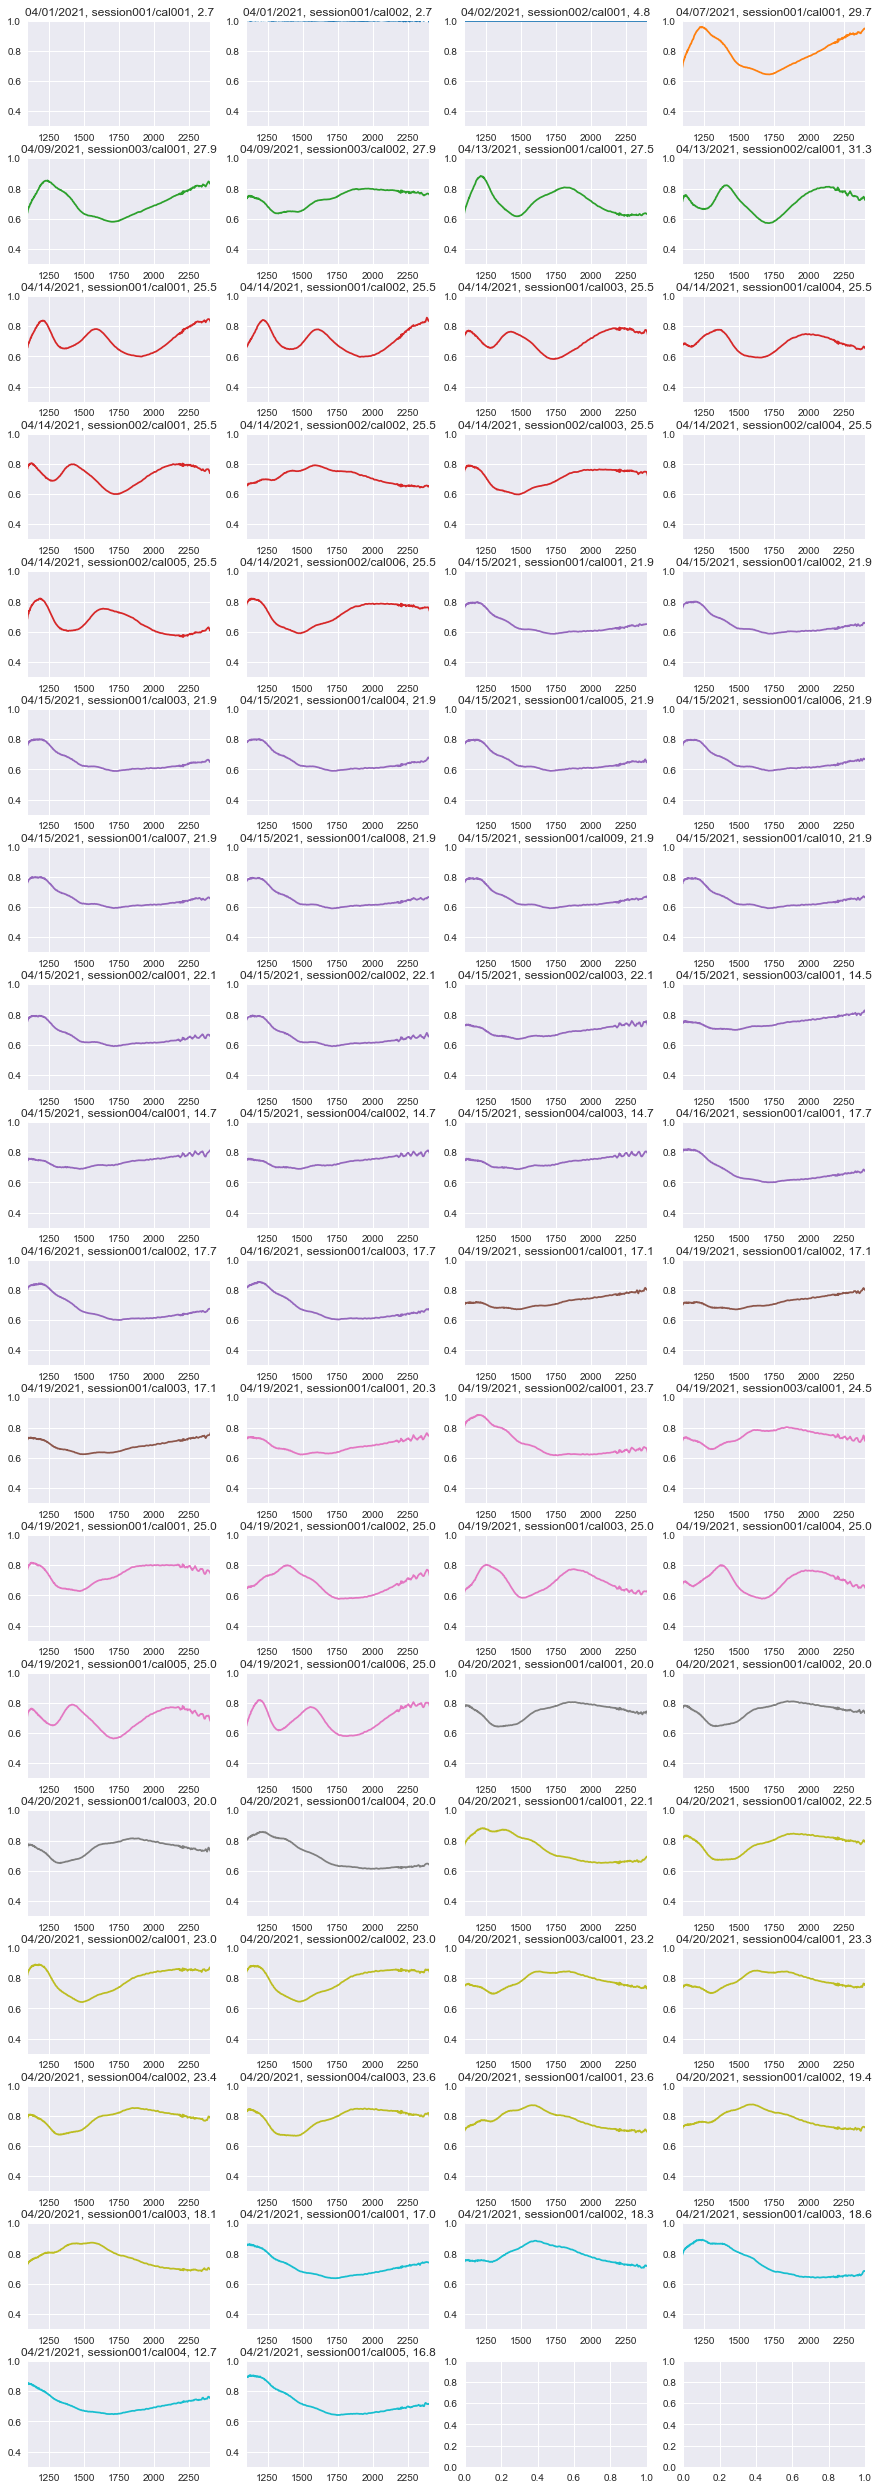

In [33]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum2'][:]

# ax.set_ylim(10000, 30000)
fig, axs = plt.subplots(nrows=18, ncols=4, figsize=(15, 45))
for ax, cal in zip(axs.flat, vis_cals):
    
    
    # ax.set_ylabel("Raw Counts with offset")
    # ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.3, 1.0)
    ax.set_xlim(1100, 2400)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.tab10(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]/big_cal
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")
plt.subplots_adjust(hspace=0.3)
plt.show()
plt.close()

### Plotting the raw data for the reference calibration and all other calibrations.

The recorded temperature for each calibration is included in the subplot title. Note that that this is not up-to-date; all calibrations in a given session will show the same temperature.

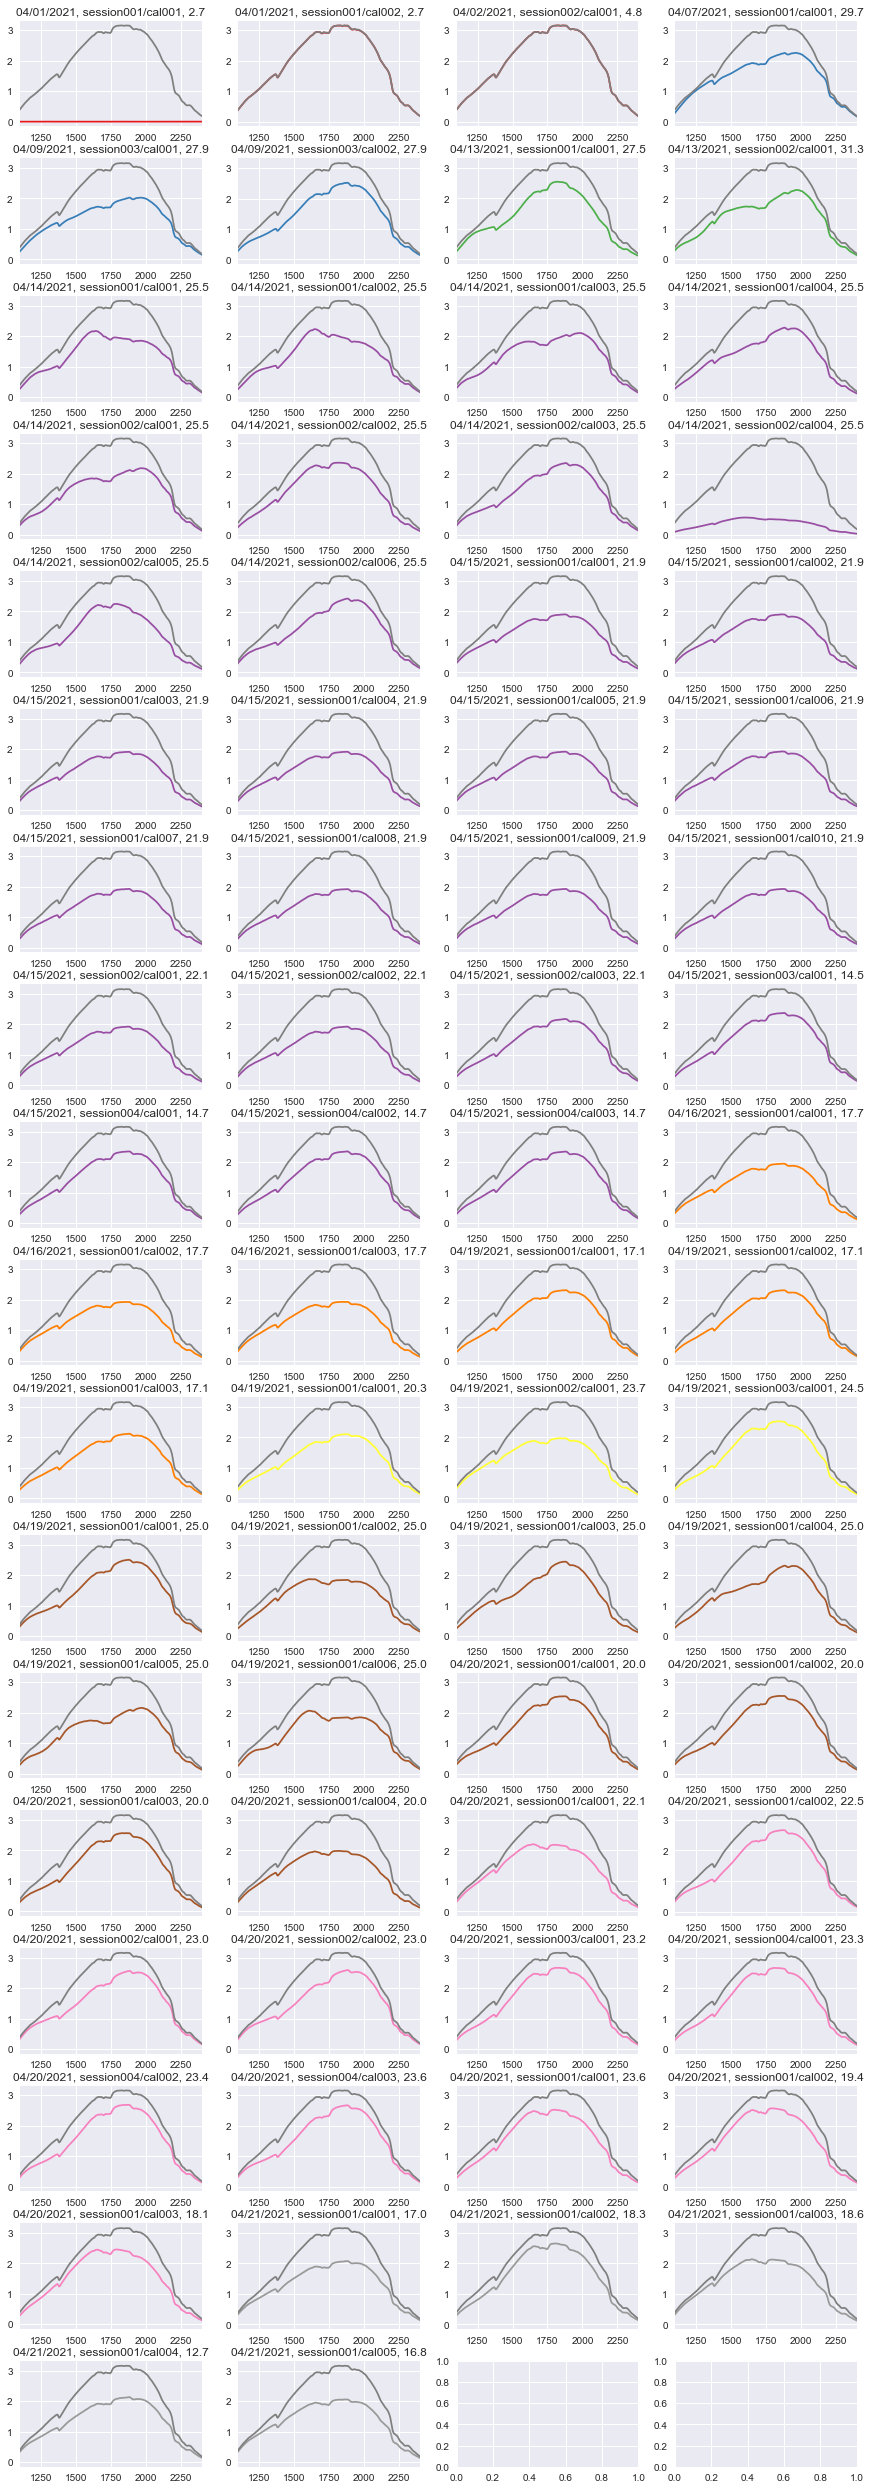

In [34]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum2'][:]

fig, axs = plt.subplots(nrows=18, ncols=4, figsize=(15, 45))
for ax, cal in zip(axs.flat, vis_cals):
    ax.set_xlim(1100, 2400)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.Set1(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.plot(waves, big_cal, "tab:gray")
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")
plt.subplots_adjust(hspace=0.3)
plt.show()
plt.close()

In [35]:
this_afternoon = path_name + '210420_green_tests/green_testing_210420b.h5'
temps = []
with h5py.File(this_afternoon, 'r') as h5_file:
    new_insertions = list(h5_file['session001/cal001'].keys())
    print(h5_file['session001/cal002'].keys())

<KeysViewHDF5 ['ins009', 'ins010']>


In [36]:
temps = []
with h5py.File(this_afternoon, 'r') as h5_file:
    for insertion in new_insertions:
        temps.append(h5_file[f'session001/cal001/{insertion}'].attrs['ftir_temp'])
    temps.append(h5_file['session001/cal002/ins009'].attrs['ftir_temp'])
    temps.append(h5_file['session001/cal002/ins010'].attrs['ftir_temp'])
print(temps)    

[22.14864751125117, 22.234001763175627, 22.347635787215154, 22.3192455782077, 22.40437979731206, 22.40437979731206, 22.432733660167855, 22.432733660167855, 22.46107546928181, 22.546028880775225]


### Plots of calibration ratios for the visible spectrometer

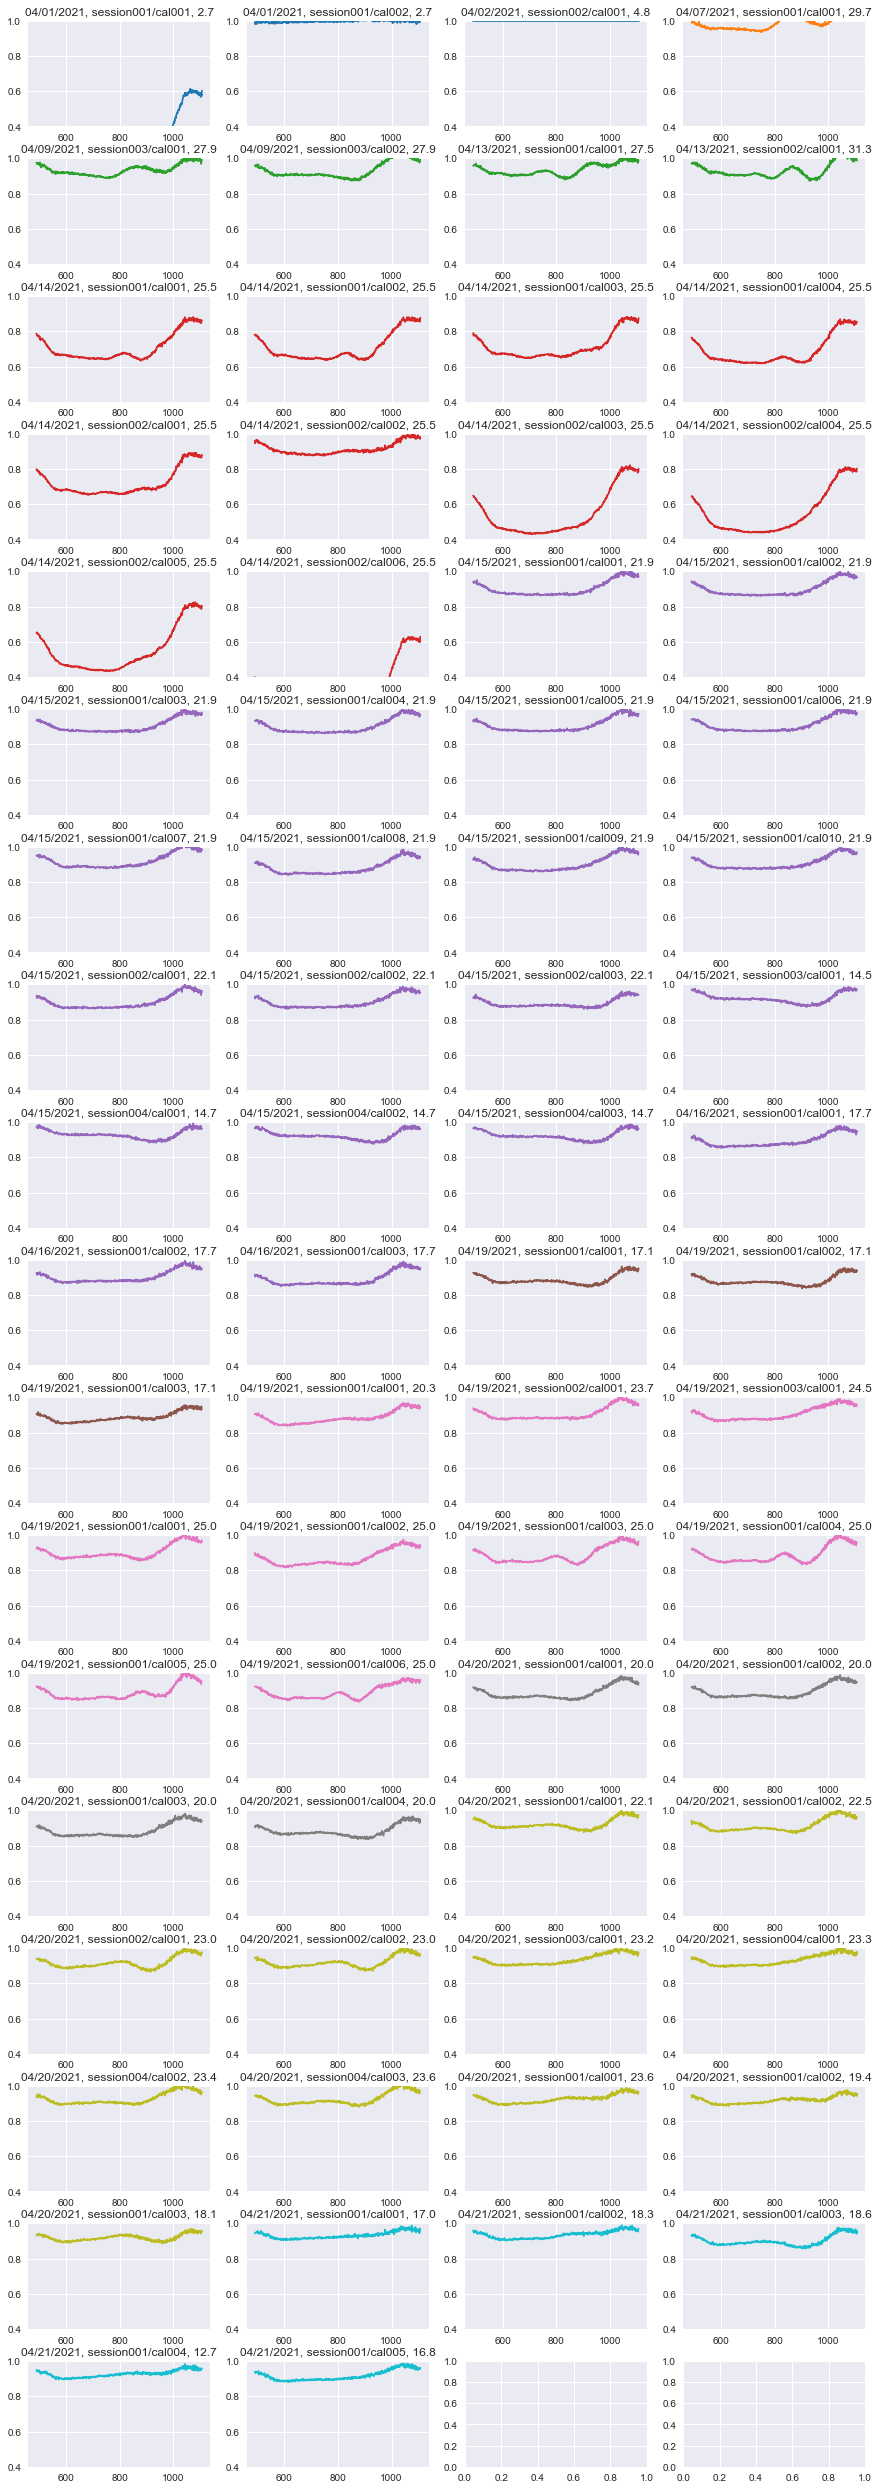

In [37]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum'][:]


fig, axs = plt.subplots(nrows=18, ncols=4, figsize=(15, 45))
for ax, cal in zip(axs.flat, vis_cals):
 
    ax.set_ylim(0.4, 1.0)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.tab10(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]/big_cal
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")
plt.subplots_adjust(hspace=0.3)
plt.show()
plt.close()

### Plots of reference calibration and all calibrations raw counts for all calibrations; visible spectrometer 

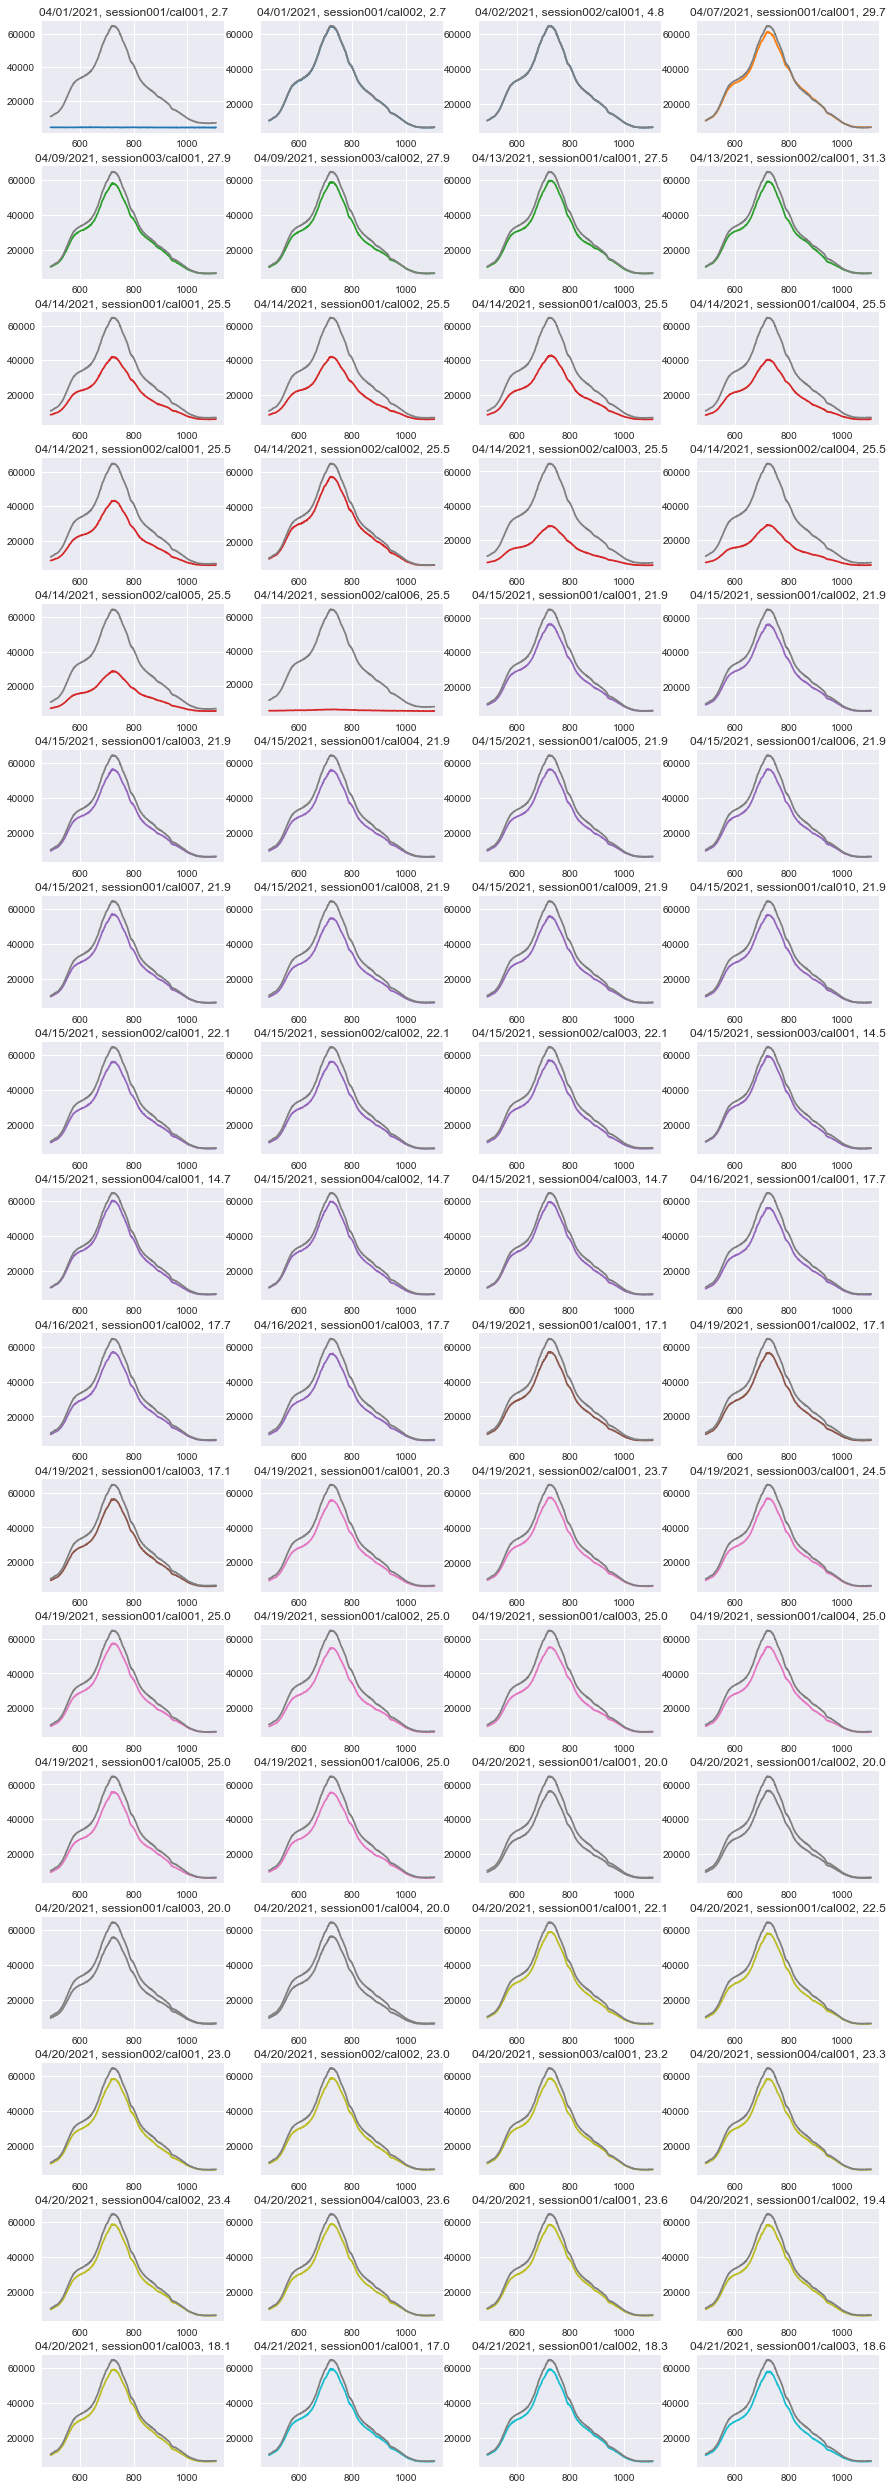

In [38]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum'][:]

fig, axs = plt.subplots(nrows=17, ncols=4, figsize=(15, 45))
for ax, cal in zip(axs.flat, vis_cals):

    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.tab10(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.plot(waves, big_cal, "tab:gray")
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")
plt.subplots_adjust(hspace=0.3)
plt.show()
plt.close()